# Wazo Salama Chatbot

### Getting the data ready

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
import json

with open(r"D:\COURSE\4.1\PROJECT\My Retrieval Based Bot\sample.json") as file:
    data = json.load(file)

Converting the json to a DataFrame

In [3]:
def frame_data(feature1, feature2, is_pattern):
    # Initializing the function parameters
    is_pattern = is_pattern
    df = pd.DataFrame(columns=[feature1, feature2])
    intents = data['intents']
    for intent in data['intents']:
        if is_pattern:
            # df = [pd.concat([pd.DataFrame([[w, intents['tag']]], columns=[feature1, feature2]) for w in intents['patterns']], ignore_index=True)]
            for pattern in intent["patterns"]:
                # store patterns in w
                w = pattern
                # create a series with pattern and tag as feature 1 and 2 resp.
                df_to_append = pd.Series([w, intent['tag']], index=df.columns)
                df = df.append(df_to_append,ignore_index=True)

                # df = pd.concat([pd.DataFrame([w, intent['tag']], index=df.columns)], ignore_index=True)
                # df = pd.concat([df, df_to_append], ignore_index=True)
                # df = pd.concat(df_to_append, ignore_index=True)
        else:
            # df = [pd.concat([pd.DataFrame([[w, intents['tag']]], columns=[feature1, feature2]) for w in intents['responses']], ignore_index=True)]
            for response in intent["responses"]:
                w = response
                df_to_append = pd.Series([w, intent['tag']], index=df.columns)
                df = df.append(df_to_append,ignore_index=True)
    return df

In [ ]:
# A DataFrame with user questions and the tags
df1 = frame_data("Questions", "Labels", True)

In [5]:
df1.head()

,Questions,Labels
0,Hi Suzie,greeting
1,Hi there,greeting
2,Is anyone there?,greeting
3,How are you?,greeting
4,Is anyone there?,greeting


In [8]:
# How many tags are in the DataFrame
df1['Labels'].value_counts(sort=False)

greeting                       9
goodbye                        6
thanks                         5
noanswer                       2
name                           4
bot location                   2
user location                  7
yesreply                       8
noreply                        7
skills                         5
what is mental health          2
what is mental ill             5
what is stress                 2
what is anxiety                6
what is suicide                2
what is depression             4
who mental illness affects     2
causes of mental illness       3
symptoms of Depression         3
symptoms of anxiety            3
depression                     4
recover                        2
suicide                        5
sad                            4
demotivated                    6
others                         4
find someone                   2
treatment options              2
treatment tips                 2
hallucinate                    2
Death     

In [9]:
len(df1.Labels.unique())

40

In [10]:
len(df1.Labels)

168

In [ ]:
# A DataFrame with Bot Responses and the tags
df2 = frame_data('Responses', 'Labels', False)


In [12]:
df2.head()

,Responses,Labels
0,"Hi there, I'm Suzie, your computerized mental ...",greeting
1,Good to see you again.Let me know how I can be...,greeting
2,"Hello, thanks for asking. I'm Suzie, your ment...",greeting
3,See you!,goodbye
4,Have a lovely day.,goodbye


In [13]:
df2.shape

(68, 2)

In [14]:
len(df2.Labels.unique())

40

In [15]:
len(df2.Labels)

68

### Data Preprocessing

In [16]:
token = [i.split() for i in df1['Labels']]
print(token)

[['greeting'], ['greeting'], ['greeting'], ['greeting'], ['greeting'], ['greeting'], ['greeting'], ['greeting'], ['greeting'], ['goodbye'], ['goodbye'], ['goodbye'], ['goodbye'], ['goodbye'], ['goodbye'], ['thanks'], ['thanks'], ['thanks'], ['thanks'], ['thanks'], ['noanswer'], ['noanswer'], ['name'], ['name'], ['name'], ['name'], ['bot', 'location'], ['bot', 'location'], ['user', 'location'], ['user', 'location'], ['user', 'location'], ['user', 'location'], ['user', 'location'], ['user', 'location'], ['user', 'location'], ['yesreply'], ['yesreply'], ['yesreply'], ['yesreply'], ['yesreply'], ['yesreply'], ['yesreply'], ['yesreply'], ['noreply'], ['noreply'], ['noreply'], ['noreply'], ['noreply'], ['noreply'], ['noreply'], ['skills'], ['skills'], ['skills'], ['skills'], ['skills'], ['what', 'is', 'mental', 'health'], ['what', 'is', 'mental', 'health'], ['what', 'is', 'mental', 'ill'], ['what', 'is', 'mental', 'ill'], ['what', 'is', 'mental', 'ill'], ['what', 'is', 'mental', 'ill'], ['wh

In [17]:
import re
import string

# Confirming regex code that shows all punctuations
x = re.compile('[%s]' % re.escape(string.punctuation))
x

re.compile(r'[!"\#\$%\&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]',
           re.UNICODE)

In [18]:
import re
import string
import joblib
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
vocab = Counter()
Labels = []

def tokenizer(entry):
    tokens = entry.split()
    re_punctuate = re.compile('[%s]' % re.escape(string.punctuation))    # This stores all punctuations
    tokens = [re_punctuate.sub('', w) for w in tokens]          # Substitutes every punctuation mark with empty space
    tokens = [word for word in tokens if word.isalpha()]        # Checks if all characters in the words are alphabets
    tokens = [word for word in tokens if word not in set(stopwords.words('English'))]   #Removes the English stopwords
    tokens = [lemmatizer.lemmatize(w.lower()) for w in tokens]     # Lemmatize every token after lowering it
    tokens = [word.lower() for word in tokens if len(word) > 1]    # Put words in lowercase
    return tokens

def save_tokens(tokenizer, df, feature):
    doc_without_stopwords = []
    for entry in df[feature]:
        tokens = tokenizer(entry)
        joblib.dump(tokens, 'Tokens.pkl')
        
    df[feature] = doc_without_stopwords.append(" ".join(tokens))
    return 

In [19]:
# Creating a Vocabulary
def create_vocab(tokenizer,df,feature):
    for entry in df[feature]:
        tokens = tokenizer(entry)   
        vocab.update(tokens)
        
    joblib.dump(vocab,'vocab.pkl')
    return

In [20]:
df1.shape

(168, 2)

In [21]:
create_vocab(tokenizer, df1, 'Questions')

In [22]:
vocab

Counter({'hi': 2,
         'suzie': 1,
         'is': 5,
         'anyone': 2,
         'how': 15,
         'hey': 1,
         'hola': 1,
         'hello': 1,
         'good': 2,
         'day': 2,
         'bye': 2,
         'see': 1,
         'later': 2,
         'goodbye': 1,
         'nice': 1,
         'chatting': 1,
         'till': 1,
         'next': 1,
         'time': 1,
         'ttyl': 1,
         'thanks': 5,
         'thank': 2,
         'thats': 1,
         'helpful': 2,
         'awesome': 1,
         'helping': 1,
         'who': 4,
         'call': 1,
         'whats': 1,
         'name': 1,
         'where': 3,
         'live': 4,
         'kenya': 1,
         'nairobi': 2,
         'thika': 1,
         'kiambu': 1,
         'nyeri': 2,
         'yes': 1,
         'yep': 1,
         'yeah': 1,
         'lot': 1,
         'im': 9,
         'glad': 1,
         'youre': 2,
         'nah': 1,
         'nope': 1,
         'suck': 1,
         'worst': 2,
         'really':

In [23]:
vocab_size = len(vocab)
vocab_size

212

In [24]:
# The test data will contain the first element of each Question

test_list = df1.groupby(by='Labels',as_index=False).first()['Questions']
test_list

0                             How do i cope with death?
1                 Does meditation help stop alcoholism?
2                   How do I seek help from alcoholism?
3                                   Where are you from?
4                           What causes mental illness?
5                       I dont feel like doing anything
6                            Why am I feeling depressed
7                                         im panicking 
8     I am stressed due to lack of financial support...
9     How to find mental health professional for myself
10                                                  Bye
11                                             Hi Suzie
12                         Why do I get hallucinations?
13                                  How can I get help?
14                                       tell me a joke
15                                               hahaha
16                                         Who are you?
17                                              

In [25]:
# Test Indices
test_index = []
for i,_ in enumerate(test_list):    # can also use iteritems to loop through the Series
    idx = df1[df1.Questions == test_list[i]].index[0]
    test_index.append(idx)

print(test_index)

[120, 164, 162, 26, 78, 102, 87, 138, 127, 112, 9, 0, 118, 141, 129, 132, 22, 20, 43, 108, 91, 98, 50, 93, 135, 81, 84, 15, 114, 116, 28, 166, 64, 72, 55, 57, 62, 70, 76, 35]


In [26]:
# Train Indices = All Indices - Test Indices

train_index = [idx for idx in df1.index if idx not in test_index]
print(train_index)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 67, 68, 69, 71, 73, 74, 75, 77, 79, 80, 82, 83, 85, 86, 88, 89, 90, 92, 94, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 107, 109, 110, 111, 113, 115, 117, 119, 121, 122, 123, 124, 125, 126, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 165, 167]


Vectorize Corpus

In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def convert_seq(df, feature):
    t =Tokenizer()
    entries = [entry for entry in df[feature]]
    print("Questions\n\n", entries)
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------\n")
    t.fit_on_texts(entries)                 # Updates an internal vocabulary based on lists/texts
    joblib.dump(t, "Tokenizer_t.pkl")       # Why a pkl file?
    print("Token Indices\n\n", t.word_index)
    vocab_size = len(t.word_index) + 1      # +1 for oov
    max_length = max([len(s.split()) for s in entries])
    print("--------------------------------------")
    print("Max Length of the string: ", max_length)
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------\n")

    encoded = t.texts_to_sequences(entries) # Vectorize the tokens
    print("Vectors\n\n", encoded)
    padded = pad_sequences(encoded, maxlen=max_length, padding="pre") # Gives the vectors equal length
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------\n")
    print("Padded Vectors\n\n", padded)
    print("--------------------------------------------------------------------------------------------------------------------------------------------------------\n")


    return padded, vocab_size

In [28]:
X, vocab_size = convert_seq(df1, "Questions")

Questions

 ['Hi Suzie', 'Hi there', 'Is anyone there?', 'How are you?', 'Is anyone there?', 'Hey', 'Hola', 'Hello', 'Good day', 'Bye', 'See you later', 'Goodbye', 'Nice chatting you, bye', 'Till next time', 'TTYL.', 'Thanks.', 'Thank you.', "That's helpful.", 'Awesome, thanks.', 'Thanks for helping me.', '', '', 'Who are you?', 'Who is this?', 'what should I call you', 'whats your name?', 'Where are you from?', 'Where do you live?', 'I live in Kenya.', 'Nairobi', 'Thika', 'Kiambu', 'Nyeri', 'I live in Nyeri.', 'I live in Nairobi.', 'yes', 's', 'yep', 'yeah', 'thank you', 'thanks', 'thanks a lot', "I'm glad you're here", 'no', 'nah', 'nope', 'you suck', "you're the worst", 'not really', 'I hate you', 'What do you do?', 'How can you help me?', 'What you can do?', 'Tell me about yourself', 'What support is offered', 'What is mental health?', 'Define mental health.', 'What does it mean to have a mental illness?', 'What is mental health illness', 'Describe mental health illness', 'What is 

In [29]:
# Load fitted data
import pickle

with open(r"D:\COURSE\4.1\PROJECT\My Retrieval Based Bot\Tokenizer_t.pkl", "rb") as file:
    data = pickle.load(file)

In [30]:
data.word_counts

OrderedDict([('hi', 2),
             ('suzie', 1),
             ('there', 3),
             ('is', 16),
             ('anyone', 2),
             ('how', 17),
             ('are', 7),
             ('you', 18),
             ('hey', 1),
             ('hola', 1),
             ('hello', 1),
             ('good', 2),
             ('day', 2),
             ('bye', 2),
             ('see', 1),
             ('later', 2),
             ('goodbye', 1),
             ('nice', 1),
             ('chatting', 1),
             ('till', 1),
             ('next', 1),
             ('time', 1),
             ('ttyl', 1),
             ('thanks', 5),
             ('thank', 2),
             ("that's", 1),
             ('helpful', 2),
             ('awesome', 1),
             ('for', 7),
             ('helping', 1),
             ('me', 8),
             ('who', 5),
             ('this', 1),
             ('what', 24),
             ('should', 3),
             ('i', 53),
             ('call', 1),
             ('whats',

In [31]:
print(X)
print(vocab_size)

[[  0   0   0 ...   0  61 103]
 [  0   0   0 ...   0  61  44]
 [  0   0   0 ...   6  62  44]
 ...
 [  0   0   0 ...   3 261  25]
 [  0   0   0 ...  60 102 262]
 [  0   0   0 ...   6 102 263]]
264


In [32]:
# Put padded/encoded data in a DataFrame

df_encoded = pd.DataFrame(X)
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,61,103
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,61,44
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,62,44
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,20,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,62,44


In [33]:
df1.head()

,Questions,Labels
0,Hi Suzie,greeting
1,Hi there,greeting
2,Is anyone there?,greeting
3,How are you?,greeting
4,Is anyone there?,greeting


In [34]:
# Insert labels into padded data
df_encoded["Labels"] = df1.Labels
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,61,103,greeting
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,61,44,greeting
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,62,44,greeting
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,20,4,greeting
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,62,44,greeting


In [35]:
# Encoding Labels
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()

labels = label_enc.fit_transform(df_encoded.Labels)
len(labels)

168

In [36]:
labels[0]

11

In [37]:
# Mapping each label/tag with its encoded label
mapper = {}
for index, key in enumerate(df_encoded["Labels"]):
    if key not in mapper.keys():
        mapper[key] = labels[index]

mapper

{'greeting': 11,
 'goodbye': 10,
 'thanks': 27,
 'noanswer': 17,
 'name': 16,
 'bot location': 3,
 'user location': 30,
 'yesreply': 39,
 'noreply': 18,
 'skills': 22,
 'what is mental health': 34,
 'what is mental ill': 35,
 'what is stress': 36,
 'what is anxiety': 32,
 'what is suicide': 37,
 'what is depression': 33,
 'who mental illness affects': 38,
 'causes of mental illness': 4,
 'symptoms of Depression': 25,
 'symptoms of anxiety': 26,
 'depression': 6,
 'recover': 20,
 'suicide': 23,
 'sad': 21,
 'demotivated': 5,
 'others': 19,
 'find someone': 9,
 'treatment options': 28,
 'treatment tips': 29,
 'hallucinate': 12,
 'Death': 0,
 'financial stress': 8,
 'jokes': 14,
 'laugh': 15,
 'swahili': 24,
 'emergency': 7,
 'help': 13,
 'alcohol help': 2,
 'alcohol effects': 1,
 'weed effects': 31}

Map df2 labels

In [38]:
df2.head()

,Responses,Labels
0,"Hi there, I'm Suzie, your computerized mental ...",greeting
1,Good to see you again.Let me know how I can be...,greeting
2,"Hello, thanks for asking. I'm Suzie, your ment...",greeting
3,See you!,goodbye
4,Have a lovely day.,goodbye


In [39]:
#df2 has missing values
df2['Labels'] = df2['Labels'].map(mapper).astype({'Labels': 'int32'})
df2.head()

,Responses,Labels
0,"Hi there, I'm Suzie, your computerized mental ...",11
1,Good to see you again.Let me know how I can be...,11
2,"Hello, thanks for asking. I'm Suzie, your ment...",11
3,See you!,10
4,Have a lovely day.,10


In [40]:
df2.to_csv("Response.csv", index=False)

In [41]:
df_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Labels
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,61,103,greeting
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,61,44,greeting
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,62,44,greeting
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,20,4,greeting
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,62,44,greeting


In [42]:
# Creating Train and Test Data
train = df_encoded.loc[train_index]
test = df_encoded.loc[test_index]

In [43]:
print(train_index)

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 23, 24, 25, 27, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 56, 58, 59, 60, 61, 63, 65, 66, 67, 68, 69, 71, 73, 74, 75, 77, 79, 80, 82, 83, 85, 86, 88, 89, 90, 92, 94, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 107, 109, 110, 111, 113, 115, 117, 119, 121, 122, 123, 124, 125, 126, 128, 130, 131, 133, 134, 136, 137, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 165, 167]


In [44]:
print(test_index)

[120, 164, 162, 26, 78, 102, 87, 138, 127, 112, 9, 0, 118, 141, 129, 132, 22, 20, 43, 108, 91, 98, 50, 93, 135, 81, 84, 15, 114, 116, 28, 166, 64, 72, 55, 57, 62, 70, 76, 35]


In [45]:
train


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Labels
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,61,44,greeting
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,62,44,greeting
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,20,4,greeting
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,6,62,44,greeting
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,104,greeting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,0,0,0,0,0,0,0,0,...,0,0,2,258,9,4,259,3,7,help
161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,help
163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,8,1,60,260,100,alcohol help
165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,100,68,3,261,25,alcohol effects


In [46]:
test

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,Labels
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,9,1,198,35,199,Death
164,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,31,101,7,60,99,alcohol effects
162,0,0,0,0,0,0,0,0,0,0,...,0,0,5,9,1,95,7,36,99,alcohol help
26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,46,20,4,36,bot location
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,50,10,15,causes of mental illness
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,53,14,41,172,173,demotivated
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,33,19,1,27,78,depression
138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,54,219,emergency
127,0,0,0,0,0,0,0,0,0,0,...,209,210,3,91,11,211,48,92,85,financial stress
112,0,0,0,0,0,0,0,0,0,0,...,0,5,3,55,10,25,187,21,80,find someone


In [47]:
train.Labels.value_counts()

help                          20
greeting                       8
yesreply                       7
Death                          6
user location                  6
noreply                        6
goodbye                        5
demotivated                    5
what is anxiety                5
thanks                         4
skills                         4
what is mental ill             4
suicide                        4
others                         3
sad                            3
depression                     3
name                           3
what is depression             3
symptoms of Depression         2
symptoms of anxiety            2
emergency                      2
swahili                        2
laugh                          2
jokes                          2
causes of mental illness       2
who mental illness affects     1
alcohol effects                1
alcohol help                   1
noanswer                       1
financial stress               1
treatment 

In [48]:
test.Labels.value_counts()

Death                         1
alcohol effects               1
skills                        1
suicide                       1
swahili                       1
symptoms of Depression        1
symptoms of anxiety           1
thanks                        1
treatment options             1
treatment tips                1
user location                 1
weed effects                  1
what is anxiety               1
what is depression            1
what is mental health         1
what is mental ill            1
what is stress                1
what is suicide               1
who mental illness affects    1
sad                           1
recover                       1
others                        1
find someone                  1
alcohol help                  1
bot location                  1
causes of mental illness      1
demotivated                   1
depression                    1
emergency                     1
financial stress              1
goodbye                       1
noreply 

### Splitting the data

In [49]:
X_train = train.drop(columns=['Labels'], axis=1)
y_train = train.Labels
X_test = test.drop(columns=['Labels'], axis=1)
y_test = test.Labels

In [50]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,61,44
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,62,44
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,20,4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6,62,44
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,104


In [51]:
X_train.shape

(128, 23)

In [52]:
y_train.shape,y_test.shape

((128,), (40,))

In [53]:
y_train.head()

1    greeting
2    greeting
3    greeting
4    greeting
5    greeting
Name: Labels, dtype: object

In [54]:
y_test.head()

120                       Death
164             alcohol effects
162                alcohol help
26                 bot location
78     causes of mental illness
Name: Labels, dtype: object

In [55]:
y_train = pd.get_dummies(y_train).values
y_test = pd.get_dummies(y_test).values

# y_train.head()

In [56]:
# y_test.head()

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(128, 23)
(128, 40)
(40, 23)
(40, 40)


### Modelling

In [57]:
input_length = X_train.shape[1]

## LSTM

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [66]:
def defined_LSTM(vocab_size, input_length):
    
    dimensions = 300
    model = Sequential()
    model.add(Embedding(vocab_size, dimensions, input_length=input_length))
    model.add(Dropout(0.5))
    model.add(LSTM(500))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(40, activation="softmax"))
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    model.summary()

    return model

In [67]:
model = defined_LSTM(vocab_size, input_length)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 23, 300)           79200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 300)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 500)               1602000   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_5 (Dense)              (None, 40)                4040      
Total params: 1,735,340
Trainable params: 1,735,340
Non-trainable params: 0
_________________________________________________________________


In [68]:
performance = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=50, verbose = 1)

Epoch 1/50
4/4 [==============================] - 10s 920ms/step - loss: 3.6677 - accuracy: 0.1172 - val_loss: 3.7334 - val_accuracy: 0.0250
Epoch 2/50
4/4 [==============================] - 2s 368ms/step - loss: 3.5228 - accuracy: 0.1562 - val_loss: 3.7382 - val_accuracy: 0.0250
Epoch 3/50
4/4 [==============================] - 2s 395ms/step - loss: 3.4913 - accuracy: 0.1562 - val_loss: 3.8088 - val_accuracy: 0.0250
Epoch 4/50
4/4 [==============================] - 2s 374ms/step - loss: 3.4405 - accuracy: 0.1562 - val_loss: 3.9353 - val_accuracy: 0.0250
Epoch 5/50
4/4 [==============================] - 2s 466ms/step - loss: 3.3472 - accuracy: 0.1562 - val_loss: 3.8499 - val_accuracy: 0.0250
Epoch 6/50
4/4 [==============================] - 2s 448ms/step - loss: 3.3026 - accuracy: 0.1562 - val_loss: 3.9189 - val_accuracy: 0.0250
Epoch 7/50
4/4 [==============================] - 2s 478ms/step - loss: 3.2340 - accuracy: 0.1562 - val_loss: 3.8355 - val_accuracy: 0.0500
Epoch 8/50
4/4 [===

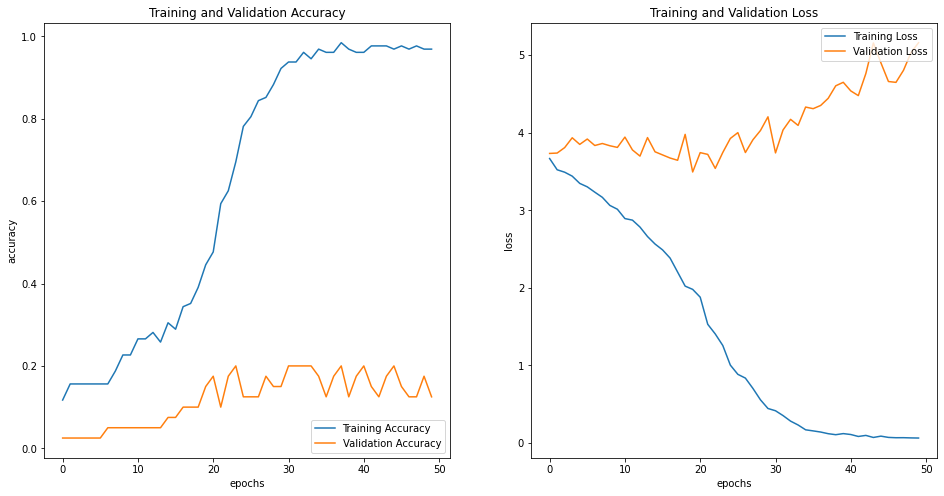

In [69]:
# Plotting Learning curves 

acc = performance.history['accuracy']
val_acc = performance.history['val_accuracy']
loss=performance.history['loss']
val_loss=performance.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

## Predictions

In [ ]:
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [ ]:
def get_text(str_text):
    # print(str_text)
    input_text  = [str_text]
    df_input = pd.DataFrame(input_text,columns=['Questions'])
    df_input
    return df_input

In [ ]:
from tensorflow.keras.models import load_model
model = model
tokenizer_t = joblib.load('tokenizer_t.pkl')
vocab = joblib.load('vocab.pkl')

In [ ]:
def tokenizer(entry):
    tokens = entry.split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    tokens = [re_punc.sub('', w) for w in tokens]
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [lemmatizer.lemmatize(w.lower()) for w in tokens]
    # stop_words = set(stopwords.words('english'))
    # tokens = [w for w in tokens if not w in stop_words]
    tokens = [word.lower() for word in tokens if len(word) > 1]
    return tokens

In [ ]:
def remove_stop_words_for_input(tokenizer,df,feature):
    doc_without_stopwords = []
    entry = df[feature][0]
    tokens = tokenizer(entry)
    doc_without_stopwords.append(' '.join(tokens))
    df[feature] = doc_without_stopwords
    return df

In [ ]:
def encode_input_text(tokenizer_t,df,feature):
    t = tokenizer_t
    entry = entry = [df[feature][0]]
    encoded = t.texts_to_sequences(entry)
    padded = pad_sequences(encoded, maxlen=16, padding='post')
    return padded

In [ ]:
def get_pred(model,encoded_input):
    pred = np.argmax(model.predict(encoded_input))
    return pred

In [ ]:
def bot_precausion(df_input,pred):
    words = df_input.Questions[0].split()
    if len([w for w in words if w in vocab])==0 :
        pred = 1
    return pred

In [ ]:
def get_response(df2,pred):
    upper_bound = df2.groupby('Labels').get_group(pred).shape[0]
    r = np.random.randint(0,upper_bound)
    responses = list(df2.groupby('Labels').get_group(pred).Responses)
    return responses[r]

In [ ]:
def bot_response(response,):
    print(response)

In [ ]:
# correct response

df_input = get_text("Tell me a joke")

# load artifacts 
tokenizer_t = joblib.load('tokenizer_t.pkl')
vocab = joblib.load('vocab.pkl')

df_input = remove_stop_words_for_input(tokenizer,df_input,'Questions')
encoded_input = encode_input_text(tokenizer_t,df_input,'Questions')

pred = get_pred(model,encoded_input)
pred = bot_precausion(df_input,pred)

response = get_response(df2,pred)
bot_response(response)

Please give me more info.


In [ ]:
# wrong response

df_input = get_text("What treatment options are available?")

#load artifacts 
tokenizer_t = joblib.load('tokenizer_t.pkl')
vocab = joblib.load('vocab.pkl')

df_input = remove_stop_words_for_input(tokenizer,df_input,'Questions')
encoded_input = encode_input_text(tokenizer_t,df_input,'Questions')

pred = get_pred(model,encoded_input)
pred = bot_precausion(df_input,pred)

response = get_response(df2,pred)
bot_response(response)

Where you go for help will depend on the nature of the problem and/or symptoms and what best fits you.


In [ ]:
 r = model.fit(paded_seq,labels,epochs=100)
        
        model_name = "ret_chatbot.h5"
        model.save(model_name)
        print(f"{model_name} saved successfully")
        
        return r
        
if __name__ == "__main__":
    
    with open ('intents.json', 'r') as f:
        intents = json.load(f)
        
    data = Data_processing(intents)
    history = data.train_data(embed_dim=42,lstm_dim=120)

IndentationError: unexpected indent (2267827919.py, line 3)